
## Part I: Position-index-based board representation

In [34]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [35]:
def create_individual():
    return random.sample(range(64), 8)

In [36]:
individual = create_individual()
print(individual)

[14, 37, 41, 56, 2, 27, 21, 19]


In [37]:
def show_grid(board):
    
    n = [0]*64
    for i in board:
        n[i] = 1
    
    
    for i in range(8):
        for j in range(64):
            if j // 8 == i:
                if n[j] == 1:
                    print('  X  ',end="|")
                else:
                    print('  -  ',end="|")
        print()
        print("------------------------------------------------")


In [38]:
show_grid(individual)

  -  |  -  |  X  |  -  |  -  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  -  |  -  |  -  |  X  |  -  |
------------------------------------------------
  -  |  -  |  -  |  X  |  -  |  X  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  X  |  -  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  -  |  -  |  X  |  -  |  -  |
------------------------------------------------
  -  |  X  |  -  |  -  |  -  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  -  |  -  |  -  |  -  |  -  |
------------------------------------------------
  X  |  -  |  -  |  -  |  -  |  -  |  -  |  -  |
------------------------------------------------


In [39]:
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [40]:
pop = toolbox.population(n=5)

print(pop[0])

[39, 23, 55, 26, 1, 44, 25, 59]


In [41]:
show_grid(pop[0])

  -  |  X  |  -  |  -  |  -  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  -  |  -  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  -  |  -  |  -  |  -  |  X  |
------------------------------------------------
  -  |  X  |  X  |  -  |  -  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  -  |  -  |  -  |  -  |  X  |
------------------------------------------------
  -  |  -  |  -  |  -  |  X  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  -  |  -  |  -  |  -  |  X  |
------------------------------------------------
  -  |  -  |  -  |  X  |  -  |  -  |  -  |  -  |
------------------------------------------------


In [42]:
#fitness function
def evaFitness(individual):
    
    conflict = 0
    
    n = len(individual) #n x n
    
    for i in individual:
        for j in individual:
            col1 = i % n
            row1 = i // n
            col2 = j % n
            row2 = j // n
            
            if not ((col1 == col2) and (row1 == row2)):
                if (row1 == row2) or (col1 == col2) or (abs(row1 - row2) == abs(col1 - col2)):
                    conflict += 1
    conflict = (conflict // 2)
    return (checkDuplicate(individual) + conflict,)
    
# Calculate the number of queen pairs in the same position for any given board
def checkDuplicate(individual):
    dup = 0
    seen = set()
    for i in individual:
        if i in seen:
            dup += 1
        seen.add(i)
    return (dup * 50) #multiply by 50 to add penalty for duplicates

In [43]:
testBestInd = [14, 61, 51, 40, 1, 18, 31, 39]
fitness = evaFitness(testBestInd)
print(fitness)

(1,)


In [44]:
toolbox.register("evaluate", evaFitness)

In [45]:
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low = 0, up = 63, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

In [46]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)

In [47]:
stats.register("avg", np.mean)
stats.register("min", np.min)

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline  

pop = toolbox.population(n=100)
hof = tools.HallOfFame(maxsize=1)
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=2000, 
                                   stats=stats, halloffame=hof, verbose=True)


gen	nevals	avg  	min
0  	100   	10.44	6  
1  	65    	18.5 	6  
2  	65    	19.38	6  
3  	64    	13.79	4  
4  	57    	12.01	4  
5  	61    	15.18	4  
6  	56    	11.27	4  
7  	43    	11.88	2  
8  	64    	12.97	2  
9  	62    	12.72	2  
10 	60    	13.06	2  
11 	65    	10.3 	2  
12 	57    	9.27 	2  
13 	54    	6.83 	2  
14 	56    	9.68 	1  
15 	59    	9.67 	2  
16 	65    	5.88 	2  
17 	56    	6.11 	2  
18 	56    	2.82 	1  
19 	64    	5.45 	1  
20 	64    	4.69 	1  
21 	64    	3.93 	1  
22 	68    	2.97 	1  
23 	54    	1.74 	1  
24 	60    	1.38 	1  
25 	71    	3.88 	1  
26 	60    	1.86 	1  
27 	58    	2.23 	1  
28 	63    	1.4  	1  
29 	57    	1.76 	1  
30 	63    	2.9  	1  
31 	53    	1.29 	1  
32 	70    	1.52 	1  
33 	56    	1.79 	1  
34 	55    	2.34 	1  
35 	71    	1.91 	1  
36 	62    	2.35 	1  
37 	60    	2    	1  
38 	47    	1.8  	1  
39 	56    	2.24 	1  
40 	63    	1.78 	1  
41 	63    	1.68 	1  
42 	68    	1.34 	1  
43 	48    	1.71 	1  
44 	58    	1.96 	1  
45 	62    	3.07 	1  
46 	63    	1.

398	63    	1.8  	1  
399	64    	1.9  	1  
400	58    	2.43 	1  
401	51    	2.39 	1  
402	62    	1.9  	1  
403	70    	1.34 	1  
404	55    	1.14 	1  
405	52    	1.22 	1  
406	53    	2.38 	1  
407	51    	3.9  	1  
408	65    	2.14 	1  
409	56    	1.67 	1  
410	61    	2.22 	1  
411	61    	1.97 	1  
412	64    	1.38 	1  
413	53    	1.52 	1  
414	56    	3.79 	1  
415	58    	2.27 	1  
416	69    	2.23 	1  
417	62    	3    	1  
418	46    	2.69 	1  
419	62    	2.81 	1  
420	64    	1.13 	1  
421	52    	1.89 	1  
422	61    	1.96 	1  
423	60    	2.51 	1  
424	72    	4.32 	1  
425	72    	1.53 	1  
426	51    	1.34 	1  
427	57    	2.82 	1  
428	51    	2.46 	1  
429	67    	2.85 	1  
430	51    	1.9  	1  
431	71    	3.96 	1  
432	63    	1.82 	1  
433	67    	1.81 	1  
434	69    	2.21 	1  
435	54    	1.16 	1  
436	61    	2.45 	1  
437	54    	1.15 	1  
438	44    	2.61 	1  
439	50    	2.84 	1  
440	52    	1.91 	1  
441	63    	2.32 	1  
442	48    	1.8  	1  
443	68    	2.51 	1  
444	67    	3.37 	1  
445	66    	4.

841	54    	1.52 	1  
842	54    	2.67 	1  
843	52    	2.93 	1  
844	64    	1.94 	1  
845	60    	2.22 	1  
846	69    	2.3  	1  
847	65    	1.67 	1  
848	59    	1.73 	1  
849	55    	1.86 	1  
850	59    	2.38 	1  
851	59    	1.93 	1  
852	61    	1.88 	1  
853	65    	2.83 	1  
854	74    	2.78 	1  
855	60    	2.81 	1  
856	61    	3.3  	1  
857	62    	2.38 	1  
858	69    	1.78 	1  
859	62    	1.42 	1  
860	63    	1.76 	1  
861	59    	2    	1  
862	66    	1.42 	1  
863	54    	2.15 	1  
864	58    	2.44 	1  
865	57    	1.82 	1  
866	67    	2.48 	1  
867	57    	1.92 	1  
868	59    	1.97 	1  
869	61    	1.94 	1  
870	51    	2.74 	1  
871	58    	2.1  	1  
872	60    	1.84 	1  
873	66    	1.88 	1  
874	66    	2.83 	1  
875	59    	1.16 	1  
876	54    	2.72 	1  
877	59    	2.32 	1  
878	56    	1.75 	1  
879	57    	2.21 	1  
880	59    	1.68 	1  
881	59    	1.86 	1  
882	58    	2.42 	1  
883	72    	2.47 	1  
884	68    	1.83 	1  
885	58    	1.22 	1  
886	62    	1.69 	1  
887	57    	2.93 	1  
888	68    	2.

1254	67    	1    	0  
1255	63    	2.41 	0  
1256	60    	0.51 	0  
1257	66    	1.45 	0  
1258	53    	1.12 	0  
1259	62    	1.85 	0  
1260	63    	1.34 	0  
1261	54    	0.91 	0  
1262	60    	0.19 	0  
1263	71    	0.37 	0  
1264	57    	0.7  	0  
1265	59    	0.85 	0  
1266	60    	2.95 	0  
1267	54    	1.37 	0  
1268	53    	1.8  	0  
1269	59    	1.75 	0  
1270	68    	0.8  	0  
1271	67    	0.41 	0  
1272	58    	0.85 	0  
1273	66    	2.37 	0  
1274	61    	1.23 	0  
1275	58    	1.37 	0  
1276	50    	2.31 	0  
1277	60    	1.21 	0  
1278	62    	2.46 	0  
1279	76    	1.36 	0  
1280	48    	0.8  	0  
1281	58    	0.35 	0  
1282	54    	1.96 	0  
1283	52    	0.29 	0  
1284	62    	0.81 	0  
1285	57    	0.77 	0  
1286	66    	2.53 	0  
1287	64    	0.9  	0  
1288	67    	0.39 	0  
1289	64    	1.71 	0  
1290	63    	2.03 	0  
1291	58    	0.51 	0  
1292	65    	0.35 	0  
1293	53    	0.95 	0  
1294	55    	0.62 	0  
1295	60    	0.77 	0  
1296	70    	2.24 	0  
1297	62    	1.39 	0  
1298	64    	1.64 	0  
1299	65   

1650	62    	1.95 	0  
1651	53    	1.03 	0  
1652	62    	1.13 	0  
1653	75    	0.37 	0  
1654	53    	3.36 	0  
1655	58    	0.89 	0  
1656	70    	0.99 	0  
1657	75    	0.25 	0  
1658	67    	1.84 	0  
1659	62    	1.04 	0  
1660	56    	0.76 	0  
1661	63    	0.57 	0  
1662	53    	0.8  	0  
1663	57    	1.86 	0  
1664	68    	3.36 	0  
1665	50    	2.04 	0  
1666	60    	0.9  	0  
1667	66    	1.99 	0  
1668	54    	1.16 	0  
1669	58    	0.25 	0  
1670	63    	1.79 	0  
1671	63    	1.49 	0  
1672	60    	1.85 	0  
1673	53    	1.76 	0  
1674	58    	0.83 	0  
1675	54    	0.82 	0  
1676	68    	0.82 	0  
1677	67    	1.39 	0  
1678	56    	0.49 	0  
1679	62    	0.37 	0  
1680	68    	0.15 	0  
1681	61    	1.3  	0  
1682	52    	0.81 	0  
1683	64    	0.35 	0  
1684	66    	2.89 	0  
1685	57    	0.81 	0  
1686	60    	0.87 	0  
1687	63    	2.35 	0  
1688	65    	1.55 	0  
1689	66    	1.41 	0  
1690	54    	1.95 	0  
1691	56    	0.91 	0  
1692	66    	2.91 	0  
1693	60    	2.05 	0  
1694	55    	0.97 	0  
1695	59   

In [49]:
#last generation
pop

[[11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [46, 50, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 9],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 8, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 60, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 46, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 28, 58, 39, 54, 41],
 [11, 5, 16, 2

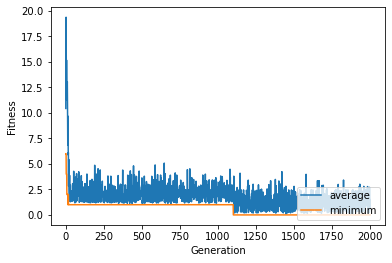

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline  

gen, avg, min_ = log.select("gen", "avg", "min")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()

### Print out the best individual found and its fitness value.  Show the best individual as chessboard

In [51]:
best_ind = tools.selBest(pop, k=1)[0]
print('Best individual is:', best_ind)
print('With fitness: ', toolbox.evaluate(best_ind))
show_grid(best_ind)

Best individual is: [11, 5, 16, 28, 58, 39, 54, 41]
With fitness:  (0,)
  -  |  -  |  -  |  -  |  -  |  X  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  X  |  -  |  -  |  -  |  -  |
------------------------------------------------
  X  |  -  |  -  |  -  |  -  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  -  |  X  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  -  |  -  |  -  |  -  |  X  |
------------------------------------------------
  -  |  X  |  -  |  -  |  -  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  -  |  -  |  -  |  X  |  -  |
------------------------------------------------
  -  |  -  |  X  |  -  |  -  |  -  |  -  |  -  |
------------------------------------------------


## Part II: Row-index-based board representation

In [52]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


In [53]:
toolbox = base.Toolbox()

toolbox.register("attr_int", random.randint, 0, 7)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_int, n=8)

In [54]:
individual = toolbox.individual()
print(individual)

[3, 4, 5, 7, 7, 3, 4, 1]


In [55]:
def show_grid(board):
    
    n = [0]*64
    
    for i in range(len(board)):
        n[board[i] + i*8] = 1
      
    
    for i in range(8):
        for j in range(64):
            if j // 8 == i:
                if n[j] == 1:
                    print(  '  X  ',end="|")
                else:
                    print('  -  ',end="|")
        print()
        print("------------------------------------------------")


In [56]:
show_grid(individual)

  -  |  -  |  -  |  X  |  -  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  -  |  X  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  -  |  -  |  X  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  -  |  -  |  -  |  -  |  X  |
------------------------------------------------
  -  |  -  |  -  |  -  |  -  |  -  |  -  |  X  |
------------------------------------------------
  -  |  -  |  -  |  X  |  -  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  -  |  X  |  -  |  -  |  -  |
------------------------------------------------
  -  |  X  |  -  |  -  |  -  |  -  |  -  |  -  |
------------------------------------------------


In [57]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [58]:
pop = toolbox.population(n=5)

print(pop[0])

[3, 2, 6, 0, 2, 0, 4, 5]


In [59]:
show_grid(pop[0])

  -  |  -  |  -  |  X  |  -  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  X  |  -  |  -  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  -  |  -  |  -  |  X  |  -  |
------------------------------------------------
  X  |  -  |  -  |  -  |  -  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  X  |  -  |  -  |  -  |  -  |  -  |
------------------------------------------------
  X  |  -  |  -  |  -  |  -  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  -  |  X  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  -  |  -  |  X  |  -  |  -  |
------------------------------------------------


In [60]:
#fitness 
def evaFitness(individual):
    conflict = 0;
    row_col_conflict = abs(len(individual) - len(np.unique(individual)))
    conflict += row_col_conflict

    # calculate diagonals
    for i in range(len(individual)):
        for j in range(len(individual)):
            if ( i != j):
                dx = abs(i-j)
                dy = abs(individual[i] - individual[j])
                if(dx == dy):
                    conflict += 1
    return (conflict,)  

In [61]:
toolbox.register("evaluate", evaFitness)

In [62]:
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low = 0, up = 7, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

In [63]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

In [64]:
pop = toolbox.population(n=100)
hof = tools.HallOfFame(maxsize=1)
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=2000, 
                                stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg  	min
0  	100   	11.32	3  
1  	52    	8.54 	3  
2  	70    	7.35 	3  
3  	53    	5.97 	3  
4  	64    	5.08 	3  
5  	68    	4.49 	2  
6  	83    	3.9  	2  
7  	53    	3.34 	2  
8  	66    	3.23 	2  
9  	52    	2.78 	1  
10 	63    	2.65 	1  
11 	65    	2.35 	1  
12 	52    	2.02 	1  
13 	63    	1.73 	1  
14 	76    	1.57 	1  
15 	58    	1.39 	1  
16 	51    	1.3  	1  
17 	58    	1.54 	1  
18 	58    	1.45 	1  
19 	67    	1.54 	1  
20 	59    	1.38 	1  
21 	49    	1.36 	1  
22 	67    	1.41 	1  
23 	57    	1.38 	1  
24 	62    	1.3  	1  
25 	60    	1.51 	1  
26 	55    	1.33 	1  
27 	58    	1.49 	1  
28 	59    	1.65 	1  
29 	68    	1.55 	1  
30 	56    	1.39 	1  
31 	70    	1.46 	1  
32 	53    	1.35 	1  
33 	62    	1.58 	1  
34 	58    	1.37 	1  
35 	64    	1.5  	1  
36 	62    	1.37 	1  
37 	65    	1.36 	1  
38 	62    	1.31 	1  
39 	65    	1.56 	1  
40 	63    	1.58 	1  
41 	64    	1.52 	1  
42 	71    	1.3  	1  
43 	60    	1.36 	1  
44 	53    	1.48 	1  
45 	56    	1.41 	1  
46 	63    	1.

395	67    	0.44 	0  
396	65    	0.19 	0  
397	66    	0.41 	0  
398	66    	0.45 	0  
399	57    	0.49 	0  
400	58    	0.45 	0  
401	63    	0.53 	0  
402	64    	0.54 	0  
403	62    	0.24 	0  
404	69    	0.29 	0  
405	68    	0.65 	0  
406	57    	0.43 	0  
407	71    	0.4  	0  
408	59    	0.36 	0  
409	50    	0.35 	0  
410	56    	0.36 	0  
411	77    	0.64 	0  
412	65    	0.27 	0  
413	61    	0.3  	0  
414	60    	0.58 	0  
415	58    	0.29 	0  
416	54    	0.39 	0  
417	52    	0.51 	0  
418	61    	0.65 	0  
419	55    	0.55 	0  
420	67    	0.28 	0  
421	65    	0.78 	0  
422	61    	0.32 	0  
423	54    	0.4  	0  
424	55    	0.44 	0  
425	54    	0.37 	0  
426	58    	0.44 	0  
427	49    	0.17 	0  
428	69    	0.75 	0  
429	60    	0.59 	0  
430	66    	0.27 	0  
431	65    	0.23 	0  
432	73    	0.43 	0  
433	70    	0.37 	0  
434	52    	0.36 	0  
435	49    	0.22 	0  
436	53    	0.42 	0  
437	63    	0.65 	0  
438	61    	0.77 	0  
439	55    	0.18 	0  
440	58    	0.36 	0  
441	61    	0.76 	0  
442	57    	0.

786	60    	0.29 	0  
787	59    	0.4  	0  
788	56    	0.5  	0  
789	58    	0.45 	0  
790	58    	0.44 	0  
791	57    	0.49 	0  
792	57    	0.37 	0  
793	69    	0.38 	0  
794	62    	0.3  	0  
795	47    	0.15 	0  
796	63    	0.17 	0  
797	65    	0.44 	0  
798	51    	0.23 	0  
799	65    	0.59 	0  
800	61    	0.52 	0  
801	58    	0.28 	0  
802	62    	0.51 	0  
803	42    	0.47 	0  
804	59    	0.3  	0  
805	63    	0.48 	0  
806	62    	0.39 	0  
807	55    	0.68 	0  
808	61    	0.55 	0  
809	52    	0.34 	0  
810	68    	0.5  	0  
811	65    	0.36 	0  
812	64    	0.36 	0  
813	60    	0.17 	0  
814	60    	0.4  	0  
815	61    	0.52 	0  
816	67    	0.19 	0  
817	65    	0.24 	0  
818	63    	0.38 	0  
819	60    	0.54 	0  
820	62    	0.3  	0  
821	57    	0.58 	0  
822	56    	0.13 	0  
823	53    	0.39 	0  
824	52    	0.58 	0  
825	57    	0.39 	0  
826	60    	0.66 	0  
827	63    	0.39 	0  
828	52    	0.28 	0  
829	58    	0.32 	0  
830	63    	0.36 	0  
831	70    	0.63 	0  
832	66    	0.36 	0  
833	51    	0.

1176	68    	0.36 	0  
1177	57    	0.52 	0  
1178	63    	0.48 	0  
1179	54    	0.3  	0  
1180	54    	0.33 	0  
1181	49    	0.56 	0  
1182	69    	0.68 	0  
1183	59    	0.33 	0  
1184	68    	0.81 	0  
1185	60    	0.45 	0  
1186	62    	0.53 	0  
1187	53    	0.33 	0  
1188	59    	0.43 	0  
1189	60    	0.41 	0  
1190	63    	0.4  	0  
1191	51    	0.42 	0  
1192	64    	0.63 	0  
1193	52    	0.51 	0  
1194	46    	0.33 	0  
1195	64    	0.51 	0  
1196	64    	0.3  	0  
1197	63    	0.54 	0  
1198	52    	0.41 	0  
1199	55    	0.36 	0  
1200	55    	0.45 	0  
1201	52    	0.35 	0  
1202	63    	0.48 	0  
1203	51    	0.18 	0  
1204	56    	0.36 	0  
1205	48    	0.64 	0  
1206	65    	0.59 	0  
1207	62    	0.51 	0  
1208	53    	0.47 	0  
1209	58    	0.39 	0  
1210	56    	0.32 	0  
1211	53    	0.36 	0  
1212	59    	0.43 	0  
1213	72    	0.25 	0  
1214	60    	0.39 	0  
1215	50    	0.2  	0  
1216	56    	0.16 	0  
1217	61    	0.41 	0  
1218	56    	0.47 	0  
1219	53    	0.18 	0  
1220	58    	0.53 	0  
1221	70   

1562	65    	0.61 	0  
1563	64    	0.42 	0  
1564	68    	0.39 	0  
1565	70    	0.48 	0  
1566	55    	0.62 	0  
1567	52    	0.2  	0  
1568	68    	0.38 	0  
1569	54    	0.56 	0  
1570	60    	0.67 	0  
1571	60    	0.39 	0  
1572	61    	0.55 	0  
1573	67    	0.86 	0  
1574	63    	0.32 	0  
1575	59    	0.41 	0  
1576	53    	0.39 	0  
1577	51    	0.54 	0  
1578	58    	0.53 	0  
1579	59    	0.61 	0  
1580	55    	0.32 	0  
1581	53    	0.34 	0  
1582	56    	0.34 	0  
1583	62    	0.31 	0  
1584	63    	0.38 	0  
1585	60    	0.28 	0  
1586	58    	0.34 	0  
1587	62    	0.45 	0  
1588	57    	0.67 	0  
1589	49    	0.42 	0  
1590	57    	0.6  	0  
1591	59    	0.4  	0  
1592	55    	0.53 	0  
1593	66    	0.71 	0  
1594	66    	0.48 	0  
1595	63    	0.51 	0  
1596	59    	0.37 	0  
1597	62    	0.32 	0  
1598	70    	0.46 	0  
1599	61    	0.78 	0  
1600	54    	0.58 	0  
1601	55    	0.28 	0  
1602	68    	0.78 	0  
1603	56    	0.59 	0  
1604	55    	0.43 	0  
1605	57    	0.77 	0  
1606	64    	0.68 	0  
1607	72   

1944	54    	0.34 	0  
1945	62    	0.67 	0  
1946	50    	0.5  	0  
1947	69    	0.4  	0  
1948	53    	0.43 	0  
1949	47    	0.47 	0  
1950	55    	0.45 	0  
1951	63    	0.61 	0  
1952	60    	0.29 	0  
1953	65    	0.74 	0  
1954	60    	0.3  	0  
1955	51    	0.6  	0  
1956	54    	0.31 	0  
1957	58    	0.55 	0  
1958	61    	0.69 	0  
1959	48    	0.54 	0  
1960	62    	0.37 	0  
1961	71    	0.59 	0  
1962	53    	0.53 	0  
1963	54    	0.42 	0  
1964	59    	0.41 	0  
1965	62    	0.6  	0  
1966	69    	0.52 	0  
1967	58    	0.36 	0  
1968	64    	0.4  	0  
1969	58    	0.32 	0  
1970	64    	0.19 	0  
1971	58    	0.34 	0  
1972	63    	0.91 	0  
1973	48    	0.3  	0  
1974	73    	0.46 	0  
1975	62    	0.28 	0  
1976	44    	0.35 	0  
1977	70    	0.54 	0  
1978	53    	0.34 	0  
1979	65    	0.47 	0  
1980	45    	0.58 	0  
1981	66    	0.4  	0  
1982	63    	0.38 	0  
1983	59    	0.59 	0  
1984	56    	0.2  	0  
1985	57    	0.85 	0  
1986	71    	0.3  	0  
1987	58    	0.52 	0  
1988	58    	0.51 	0  
1989	52   

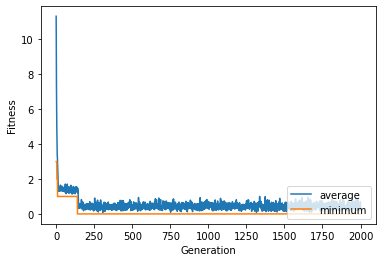

In [65]:
# Plot the "avg" and "min" for each generation

import matplotlib.pyplot as plt
%matplotlib inline  

gen, avg, min_ = log.select("gen", "avg", "min")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()

### Print out the best individual found and its fitness value.  Show the best individual as chessboard

In [66]:
best_ind = tools.selBest(pop, k=1)[0]
print('Best individual is:', best_ind)
print('With fitness: ', toolbox.evaluate(best_ind))
show_grid(best_ind)

Best individual is: [2, 4, 1, 7, 0, 6, 3, 5]
With fitness:  (0,)
  -  |  -  |  X  |  -  |  -  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  -  |  X  |  -  |  -  |  -  |
------------------------------------------------
  -  |  X  |  -  |  -  |  -  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  -  |  -  |  -  |  -  |  X  |
------------------------------------------------
  X  |  -  |  -  |  -  |  -  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  -  |  -  |  -  |  X  |  -  |
------------------------------------------------
  -  |  -  |  -  |  X  |  -  |  -  |  -  |  -  |
------------------------------------------------
  -  |  -  |  -  |  -  |  -  |  X  |  -  |  -  |
------------------------------------------------
